In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('./data/layoffs_data.csv')
df.head()

,Company,Location_HQ,Industry,Laid_Off_Count,Percentage,Date,Source,Funds_Raised (Millions),Stage,Date_Added,Country,List_of_Employees_Laid_Off,Sum of Employees,Average # of Employees Laid Off,Average Layoff %,Total Funds Raised,Average Funds Raised,Unnamed: 17,Unnamed: 18
0,Splunk,SF Bay Area,Data,325,4%,2/1/2023,https://www.marketwatch.com/story/splunk-to-la...,2400.0,IPO,2/1/2023 17:01,United States,Unknown,290317.0,262.018953,23%,850192.86,835.98,NaN,NaN
1,DraftKings,Boston,Consumer,140,4%,2/1/2023,https://www.cnbc.com/2023/02/01/draftkings-cut...,719.0,IPO,2/1/2023 19:08,United States,Unknown,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Wheel,Austin,Healthcare,56,28%,2/1/2023,https://www.beckershospitalreview.com/teleheal...,215.0,Series C,2/2/2023 0:04,United States,Unknown,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Chainalysis,New York City,Crypto,44,5%,2/1/2023,https://www.forbes.com/sites/stevenehrlich/202...,536.0,Series F,2/2/2023 3:13,United States,Unknown,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Exterro,Portland,Legal,24,3%,2/1/2023,https://www.oregonlive.com/silicon-forest/2023...,100.0,Private Equity,2/2/2023 0:05,United States,Unknown,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1108 entries, 0 to 1107
Data columns (total 19 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Company                          1108 non-null   object 
 1   Location_HQ                      1108 non-null   object 
 2   Industry                         1108 non-null   object 
 3   Laid_Off_Count                   1108 non-null   int64  
 4   Percentage                       1108 non-null   object 
 5   Date                             1108 non-null   object 
 6   Source                           1108 non-null   object 
 7   Funds_Raised (Millions)          1017 non-null   float64
 8   Stage                            1108 non-null   object 
 9   Date_Added                       1108 non-null   object 
 10  Country                          1108 non-null   object 
 11  List_of_Employees_Laid_Off       1108 non-null   object 
 12  Sum of Employees    

In [4]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Laid_Off_Count,1108.0,262.018953,856.487551,3.000000,36.000000,80.000000,180.000000,12000.000000
Funds_Raised (Millions),1017.0,835.981180,5760.130027,0.000000,60.000000,166.000000,462.000000,121900.000000
Sum of Employees,1.0,290317.000000,NaN,290317.000000,290317.000000,290317.000000,290317.000000,290317.000000
Average # of Employees Laid Off,1.0,262.018953,NaN,262.018953,262.018953,262.018953,262.018953,262.018953
Total Funds Raised,1.0,850192.860000,NaN,850192.860000,850192.860000,850192.860000,850192.860000,850192.860000
Average Funds Raised,1.0,835.980000,NaN,835.980000,835.980000,835.980000,835.980000,835.980000
Unnamed: 17,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Unnamed: 18,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# Dealing with Outliers

C:\Users\SURIYA\AppData\Local\Temp\ipykernel_23752\58359773.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr())


<Axes: >

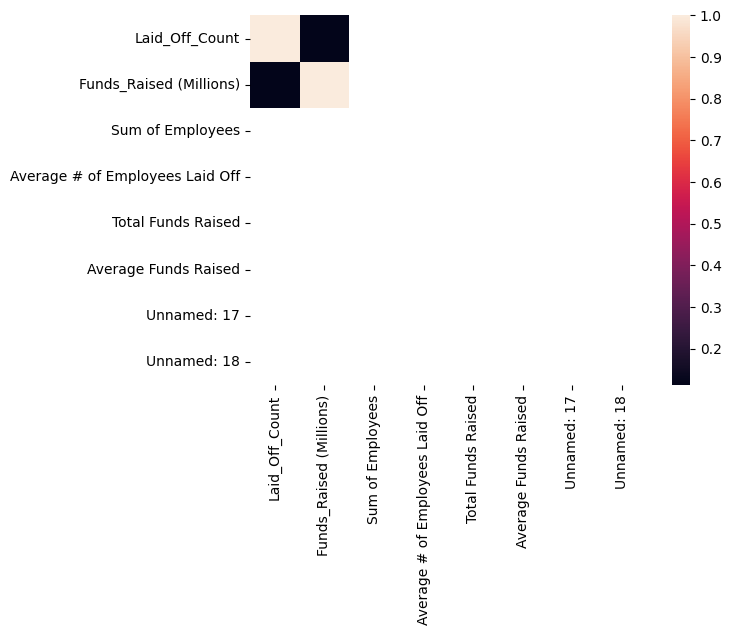

In [5]:
sns.heatmap(df.corr())

### We can clearly see that most of the values are NaN and the majority of them are categorical values

In [6]:
df.corr()['Funds_Raised (Millions)'].sort_values()

C:\Users\SURIYA\AppData\Local\Temp\ipykernel_23752\3581465308.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()['Funds_Raised (Millions)'].sort_values()


Laid_Off_Count                     0.11295
Funds_Raised (Millions)            1.00000
Sum of Employees                       NaN
Average # of Employees Laid Off        NaN
Total Funds Raised                     NaN
Average Funds Raised                   NaN
Unnamed: 17                            NaN
Unnamed: 18                            NaN
Name: Funds_Raised (Millions), dtype: float64

C:\Users\SURIYA\AppData\Local\Temp\ipykernel_23752\501549604.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df["Funds_Raised (Millions)"])


<Axes: xlabel='Funds_Raised (Millions)', ylabel='Density'>

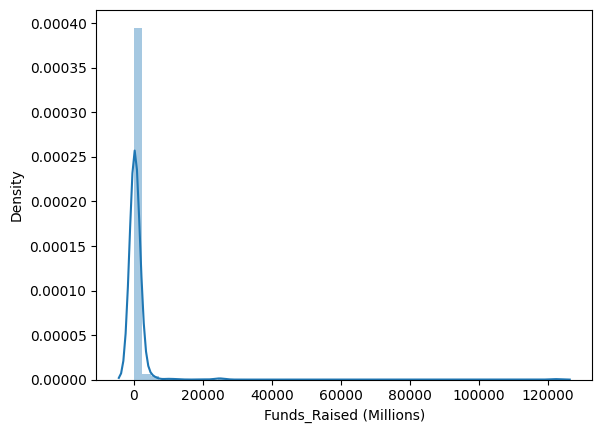

In [7]:
sns.distplot(df["Funds_Raised (Millions)"])

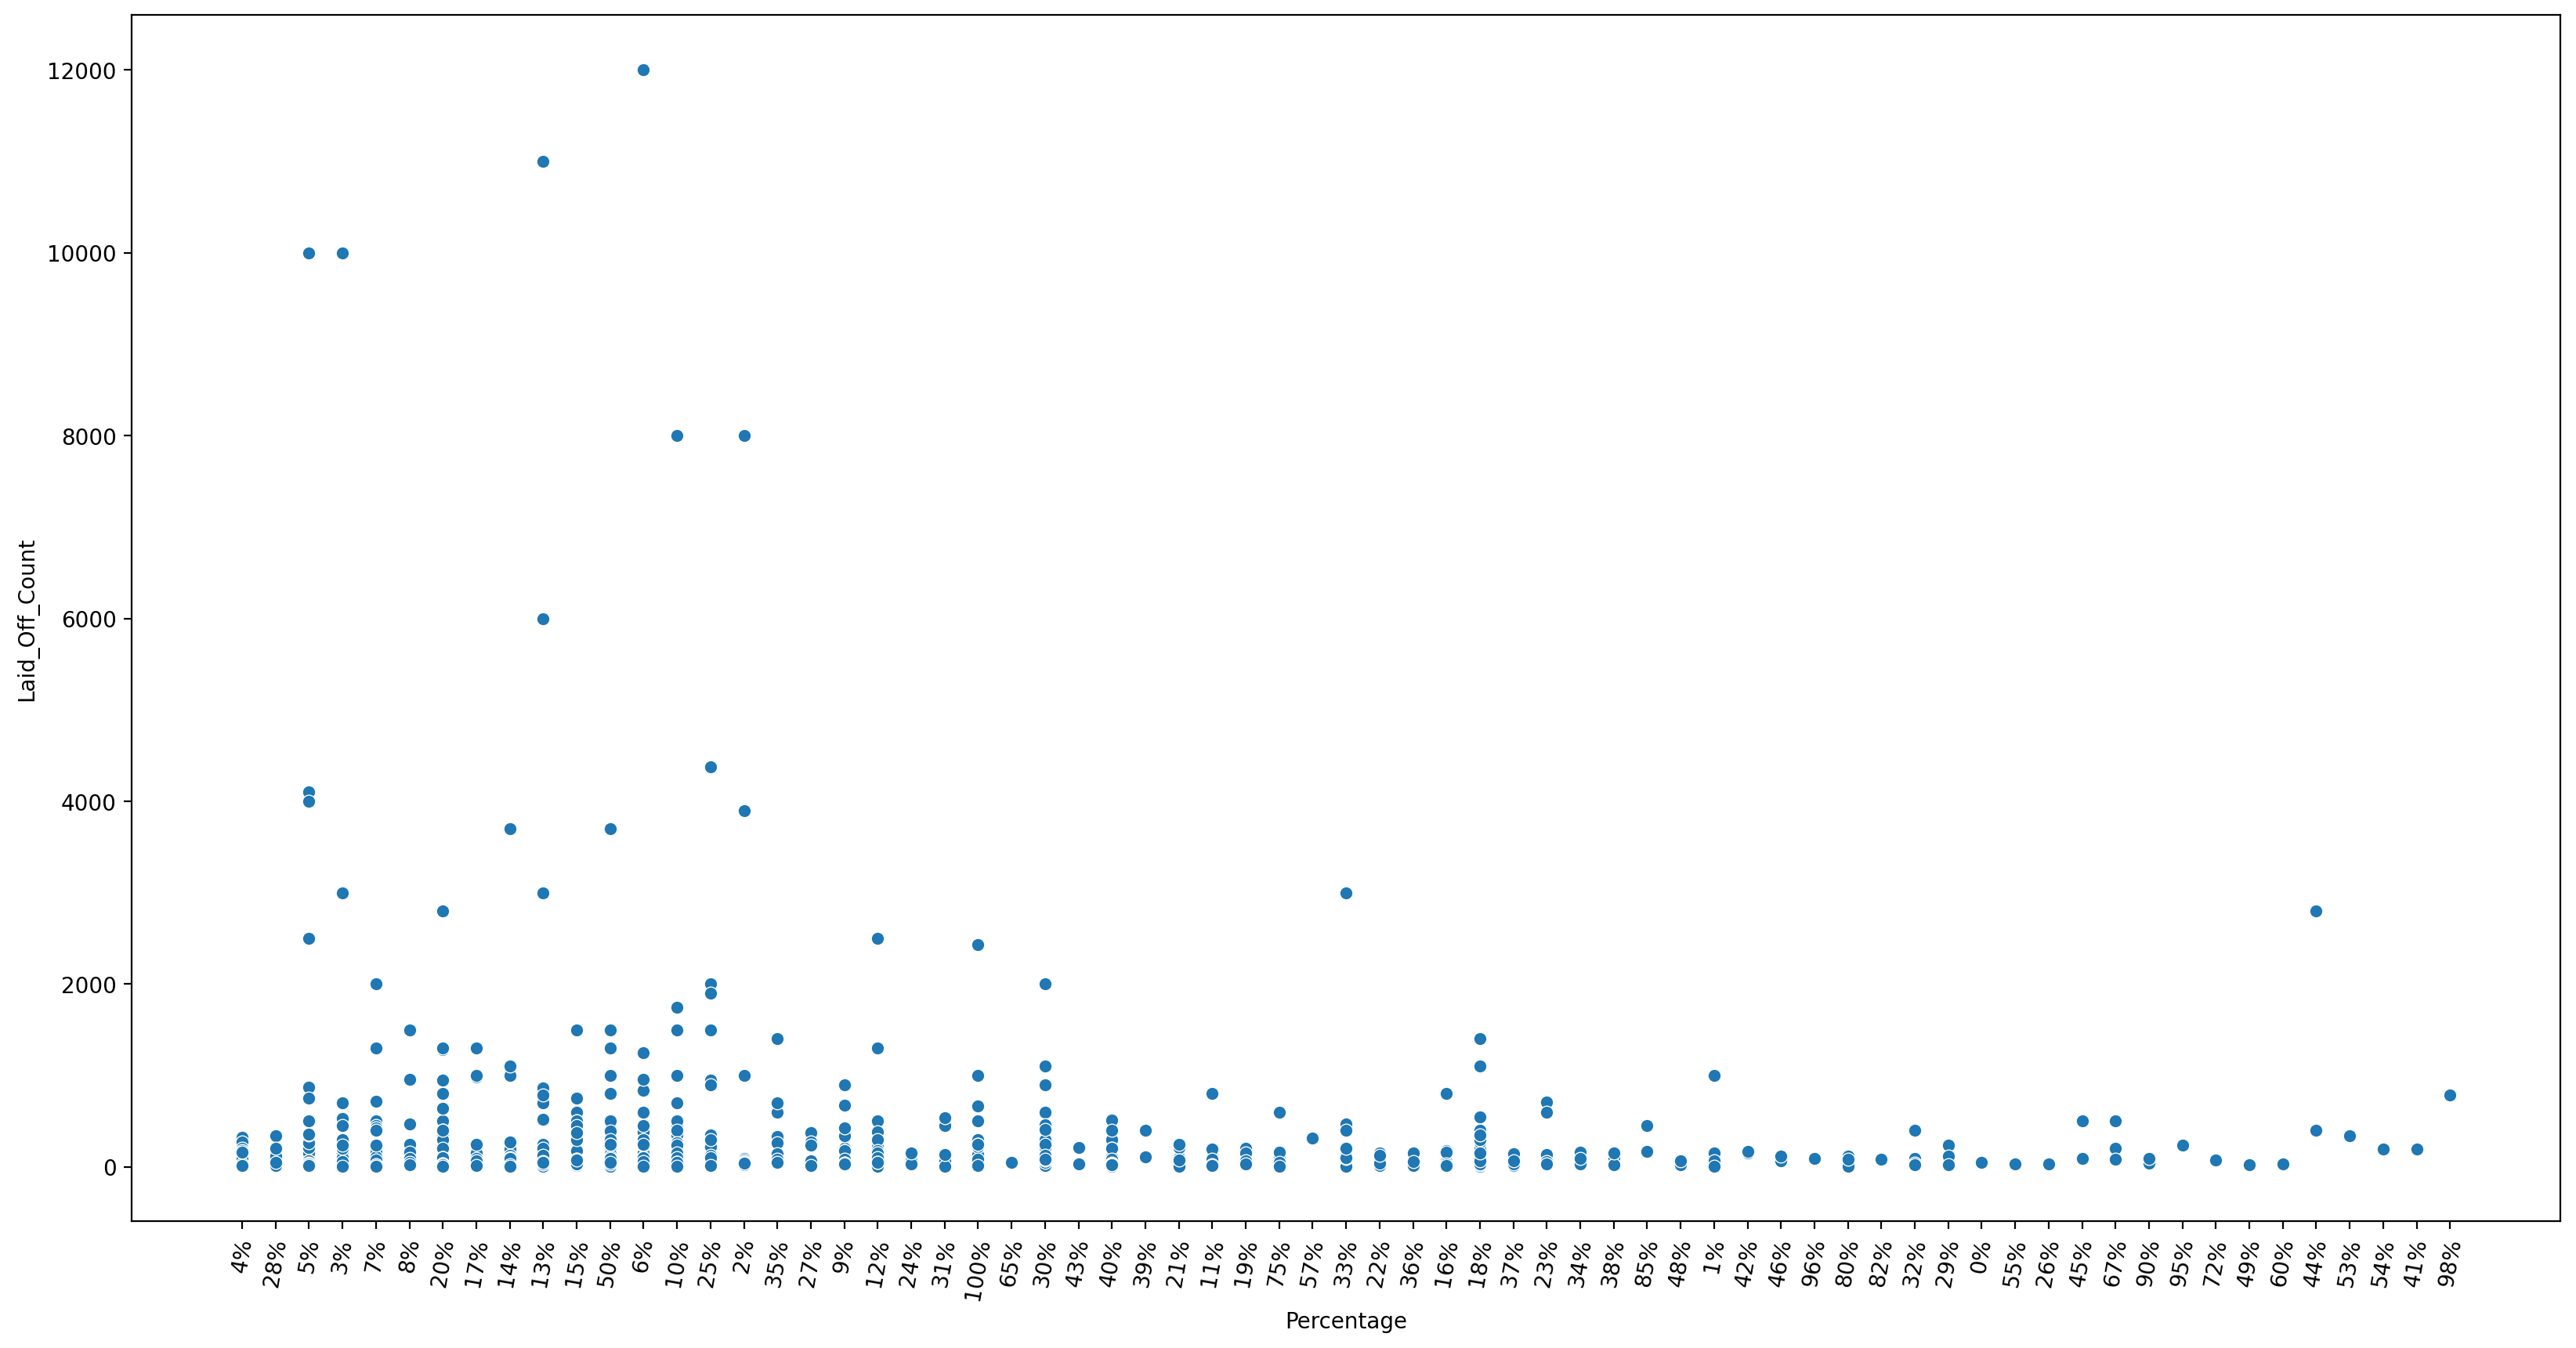

In [8]:
plt.figure(figsize=(20,10), dpi=200)
sns.scatterplot(y='Laid_Off_Count',x=df['Percentage'].sort_values(),data=df)
plt.xticks(rotation=80)
plt.show()

### From the above chart, we can clearly identify some outliers that are above 6000 in Laid_Off_Count and we can query them using the below code

In [9]:
df[(df['Laid_Off_Count']>7900)]

,Company,Location_HQ,Industry,Laid_Off_Count,Percentage,Date,Source,Funds_Raised (Millions),Stage,Date_Added,Country,List_of_Employees_Laid_Off,Sum of Employees,Average # of Employees Laid Off,Average Layoff %,Total Funds Raised,Average Funds Raised,Unnamed: 17,Unnamed: 18
45,Google,SF Bay Area,Consumer,12000,6%,1/20/2023,https://www.nytimes.com/2023/01/20/business/go...,26.0,IPO,1/20/2023 14:23,United States,Unknown,NaN,NaN,NaN,NaN,NaN,NaN,NaN
54,Microsoft,Seattle,Other,10000,5%,1/18/2023,https://www.usatoday.com/story/money/2023/01/1...,1.0,IPO,1/18/2023 2:05,United States,Unknown,NaN,NaN,NaN,NaN,NaN,NaN,NaN
117,Amazon,Seattle,Retail,8000,2%,1/4/2023,https://www.wsj.com/articles/amazon-to-lay-off...,108.0,IPO,1/5/2023 4:17,United States,Unknown,NaN,NaN,NaN,NaN,NaN,NaN,NaN
118,Salesforce,SF Bay Area,Sales,8000,10%,1/4/2023,https://www.nytimes.com/2023/01/04/business/sa...,65.0,IPO,1/4/2023 15:39,United States,https://docs.google.com/spreadsheets/d/1FViDWn...,NaN,NaN,NaN,NaN,NaN,NaN,NaN
228,Amazon,Seattle,Retail,10000,3%,11/16/2022,https://www.nytimes.com/2022/11/14/technology/...,108.0,IPO,11/16/2022 17:40,United States,https://docs.google.com/spreadsheets/d/1f0QvaM...,NaN,NaN,NaN,NaN,NaN,NaN,NaN
261,Meta,SF Bay Area,Consumer,11000,13%,11/9/2022,https://www.cnbc.com/2022/11/09/meta-to-lay-of...,26000.0,IPO,11/9/2022 15:04,United States,https://docs.google.com/spreadsheets/d/1edAZoF...,NaN,NaN,NaN,NaN,NaN,NaN,NaN


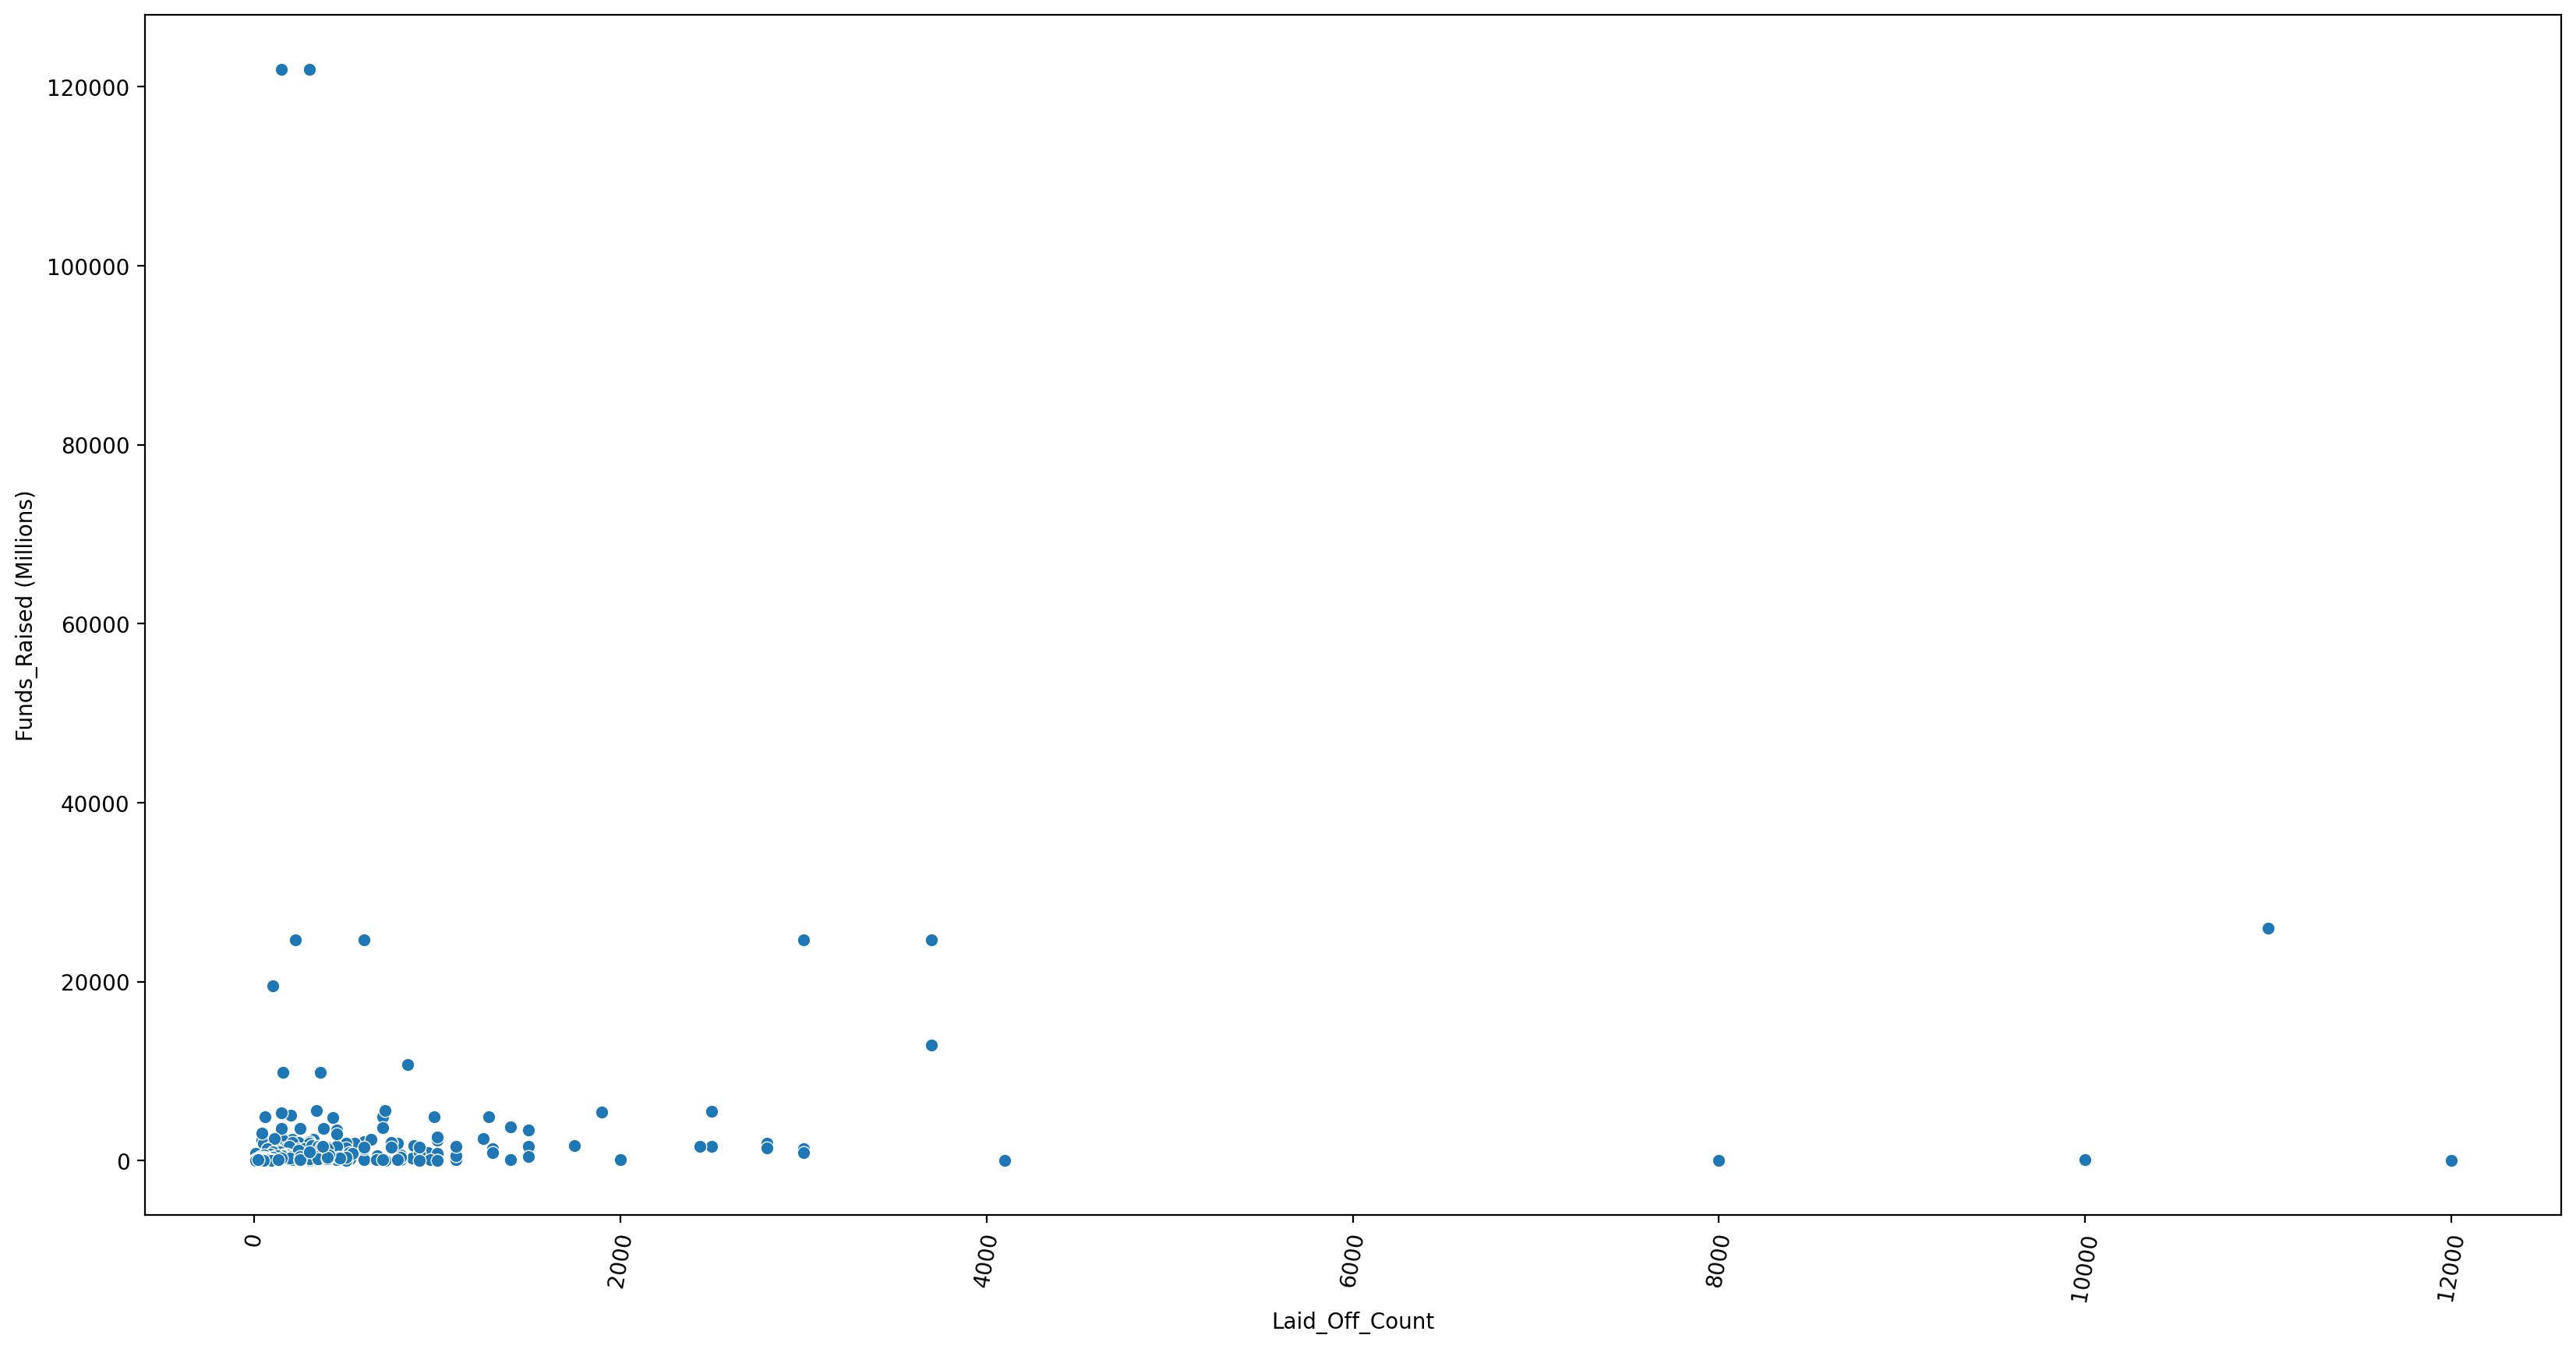

In [10]:
plt.figure(figsize=(20,10), dpi=200)
sns.scatterplot(x='Laid_Off_Count',y='Funds_Raised (Millions)',data=df)
plt.xticks(rotation=80)
plt.show()

In [11]:
df[(df['Funds_Raised (Millions)']>80000) & (df['Laid_Off_Count']<2000)]

,Company,Location_HQ,Industry,Laid_Off_Count,Percentage,Date,Source,Funds_Raised (Millions),Stage,Date_Added,Country,List_of_Employees_Laid_Off,Sum of Employees,Average # of Employees Laid Off,Average Layoff %,Total Funds Raised,Average Funds Raised,Unnamed: 17,Unnamed: 18
570,Netflix,SF Bay Area,Media,300,3%,6/23/2022,https://www.cnbc.com/2022/06/23/netflix-lays-o...,121900.0,IPO,6/23/2022 19:35,United States,Unknown,NaN,NaN,NaN,NaN,NaN,NaN,NaN
683,Netflix,SF Bay Area,Media,150,1%,5/17/2022,https://www.cnbc.com/2022/05/17/netflix-lays-o...,121900.0,IPO,5/17/2022 18:58,United States,Unknown,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [12]:
df[(df['Laid_Off_Count']>6000) & (df['Funds_Raised (Millions)']<6000)]

,Company,Location_HQ,Industry,Laid_Off_Count,Percentage,Date,Source,Funds_Raised (Millions),Stage,Date_Added,Country,List_of_Employees_Laid_Off,Sum of Employees,Average # of Employees Laid Off,Average Layoff %,Total Funds Raised,Average Funds Raised,Unnamed: 17,Unnamed: 18
45,Google,SF Bay Area,Consumer,12000,6%,1/20/2023,https://www.nytimes.com/2023/01/20/business/go...,26.0,IPO,1/20/2023 14:23,United States,Unknown,NaN,NaN,NaN,NaN,NaN,NaN,NaN
54,Microsoft,Seattle,Other,10000,5%,1/18/2023,https://www.usatoday.com/story/money/2023/01/1...,1.0,IPO,1/18/2023 2:05,United States,Unknown,NaN,NaN,NaN,NaN,NaN,NaN,NaN
117,Amazon,Seattle,Retail,8000,2%,1/4/2023,https://www.wsj.com/articles/amazon-to-lay-off...,108.0,IPO,1/5/2023 4:17,United States,Unknown,NaN,NaN,NaN,NaN,NaN,NaN,NaN
118,Salesforce,SF Bay Area,Sales,8000,10%,1/4/2023,https://www.nytimes.com/2023/01/04/business/sa...,65.0,IPO,1/4/2023 15:39,United States,https://docs.google.com/spreadsheets/d/1FViDWn...,NaN,NaN,NaN,NaN,NaN,NaN,NaN
228,Amazon,Seattle,Retail,10000,3%,11/16/2022,https://www.nytimes.com/2022/11/14/technology/...,108.0,IPO,11/16/2022 17:40,United States,https://docs.google.com/spreadsheets/d/1f0QvaM...,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [13]:
ind_drop = df[(df['Laid_Off_Count']>6000) & (df['Funds_Raised (Millions)']<6000)].index

In [14]:
df = df.drop(ind_drop,axis=0)

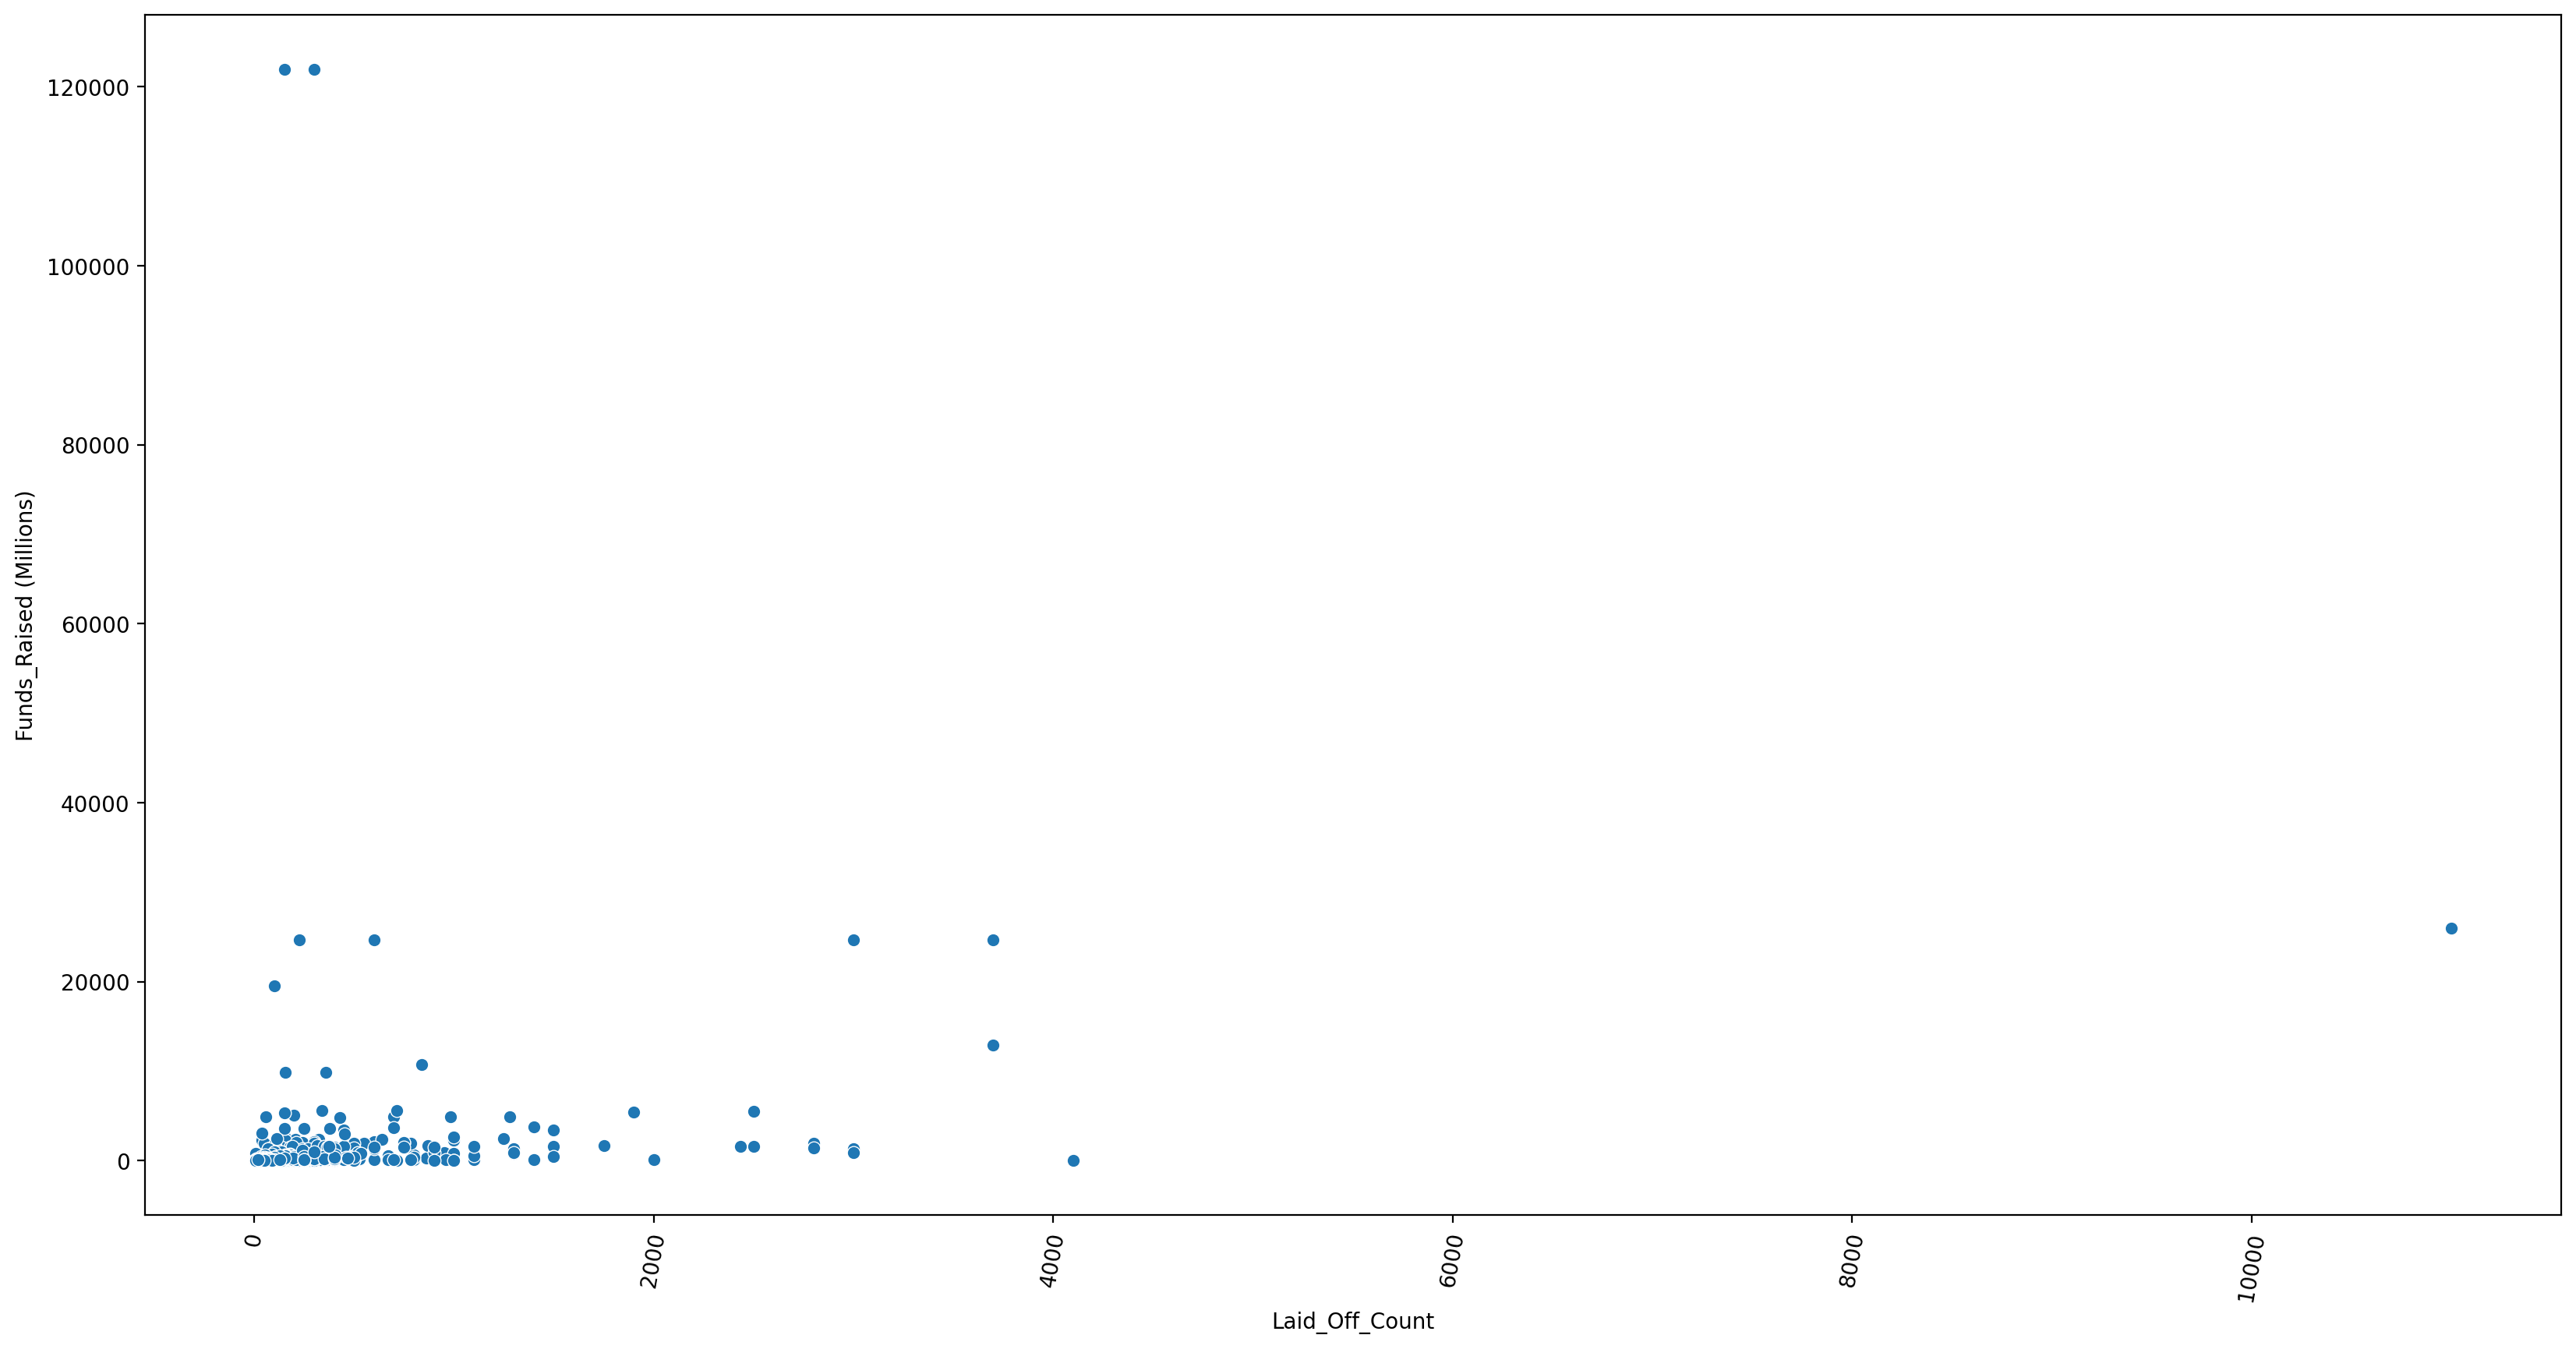

In [15]:
plt.figure(figsize=(20,10), dpi=200)
sns.scatterplot(x='Laid_Off_Count',y='Funds_Raised (Millions)',data=df)
plt.xticks(rotation=80)
plt.show()

In [16]:
ind_dr = df[(df['Funds_Raised (Millions)']>80000) & (df['Laid_Off_Count']<2000)].index

In [17]:
df = df.drop(ind_dr,axis=0)

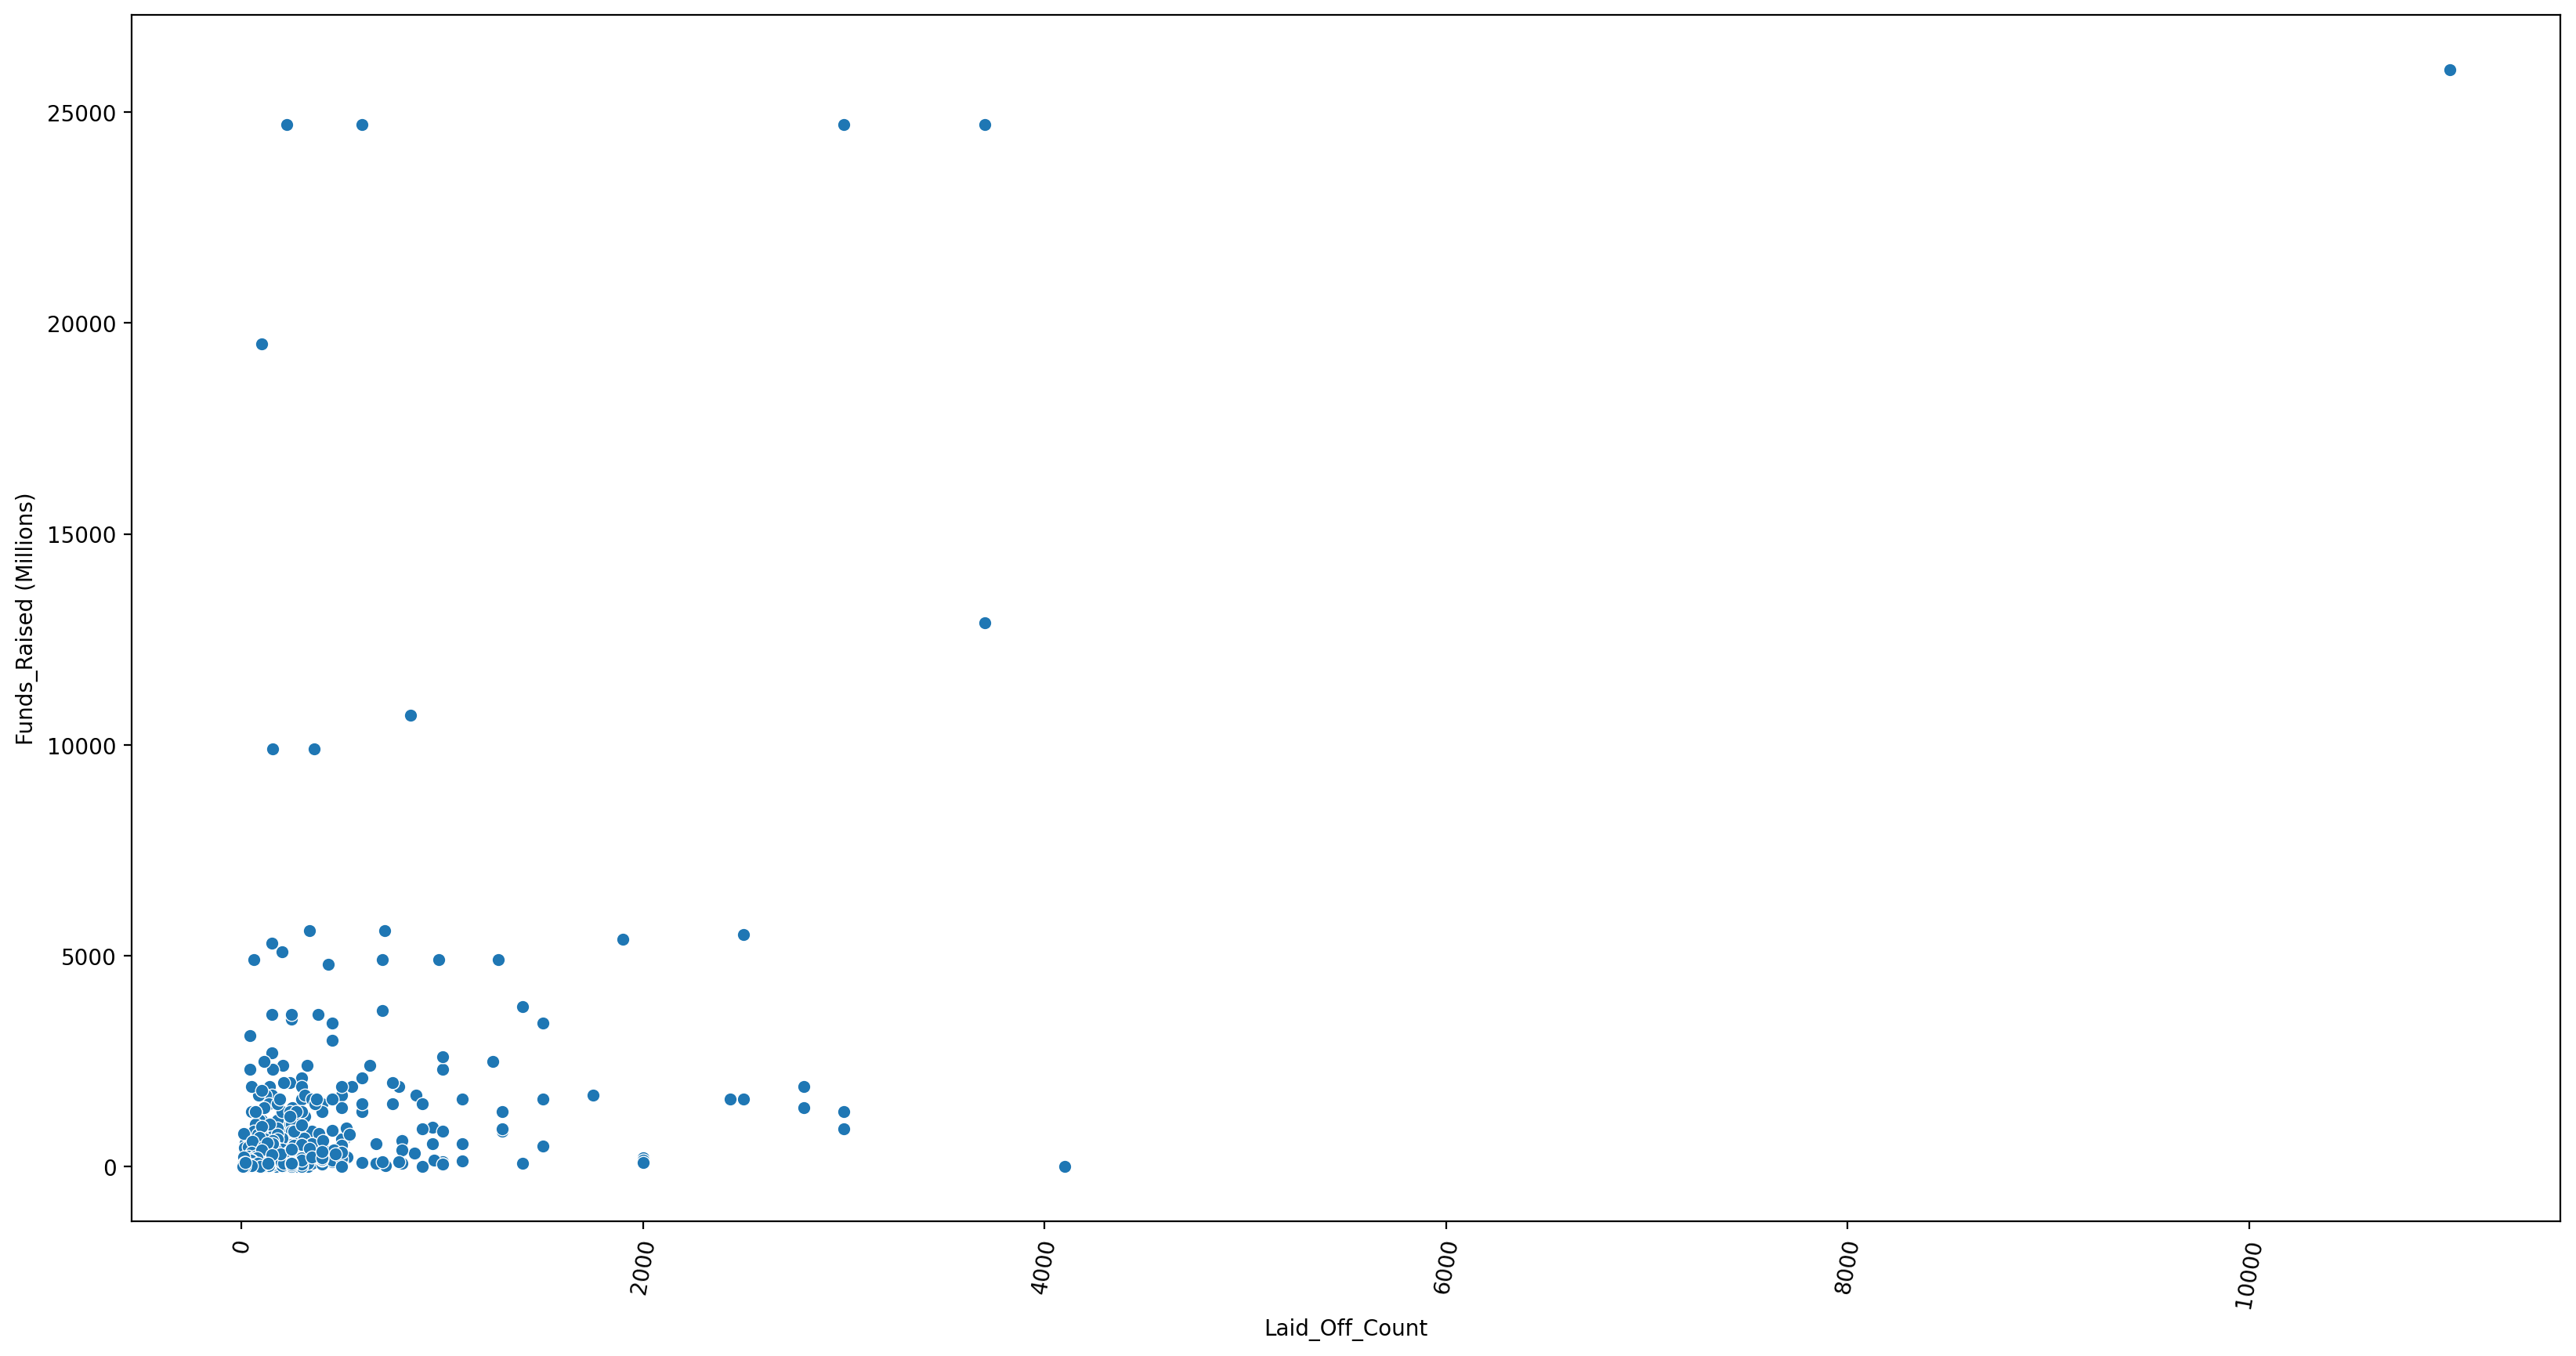

In [18]:
plt.figure(figsize=(20,10), dpi=200)
sns.scatterplot(x='Laid_Off_Count',y='Funds_Raised (Millions)',data=df)
plt.xticks(rotation=80)
plt.show()

In [19]:
df_dr = df[(df['Laid_Off_Count']>6000) & (df['Funds_Raised (Millions)']<30000)].index

In [20]:
df = df.drop(df_dr,axis=0)

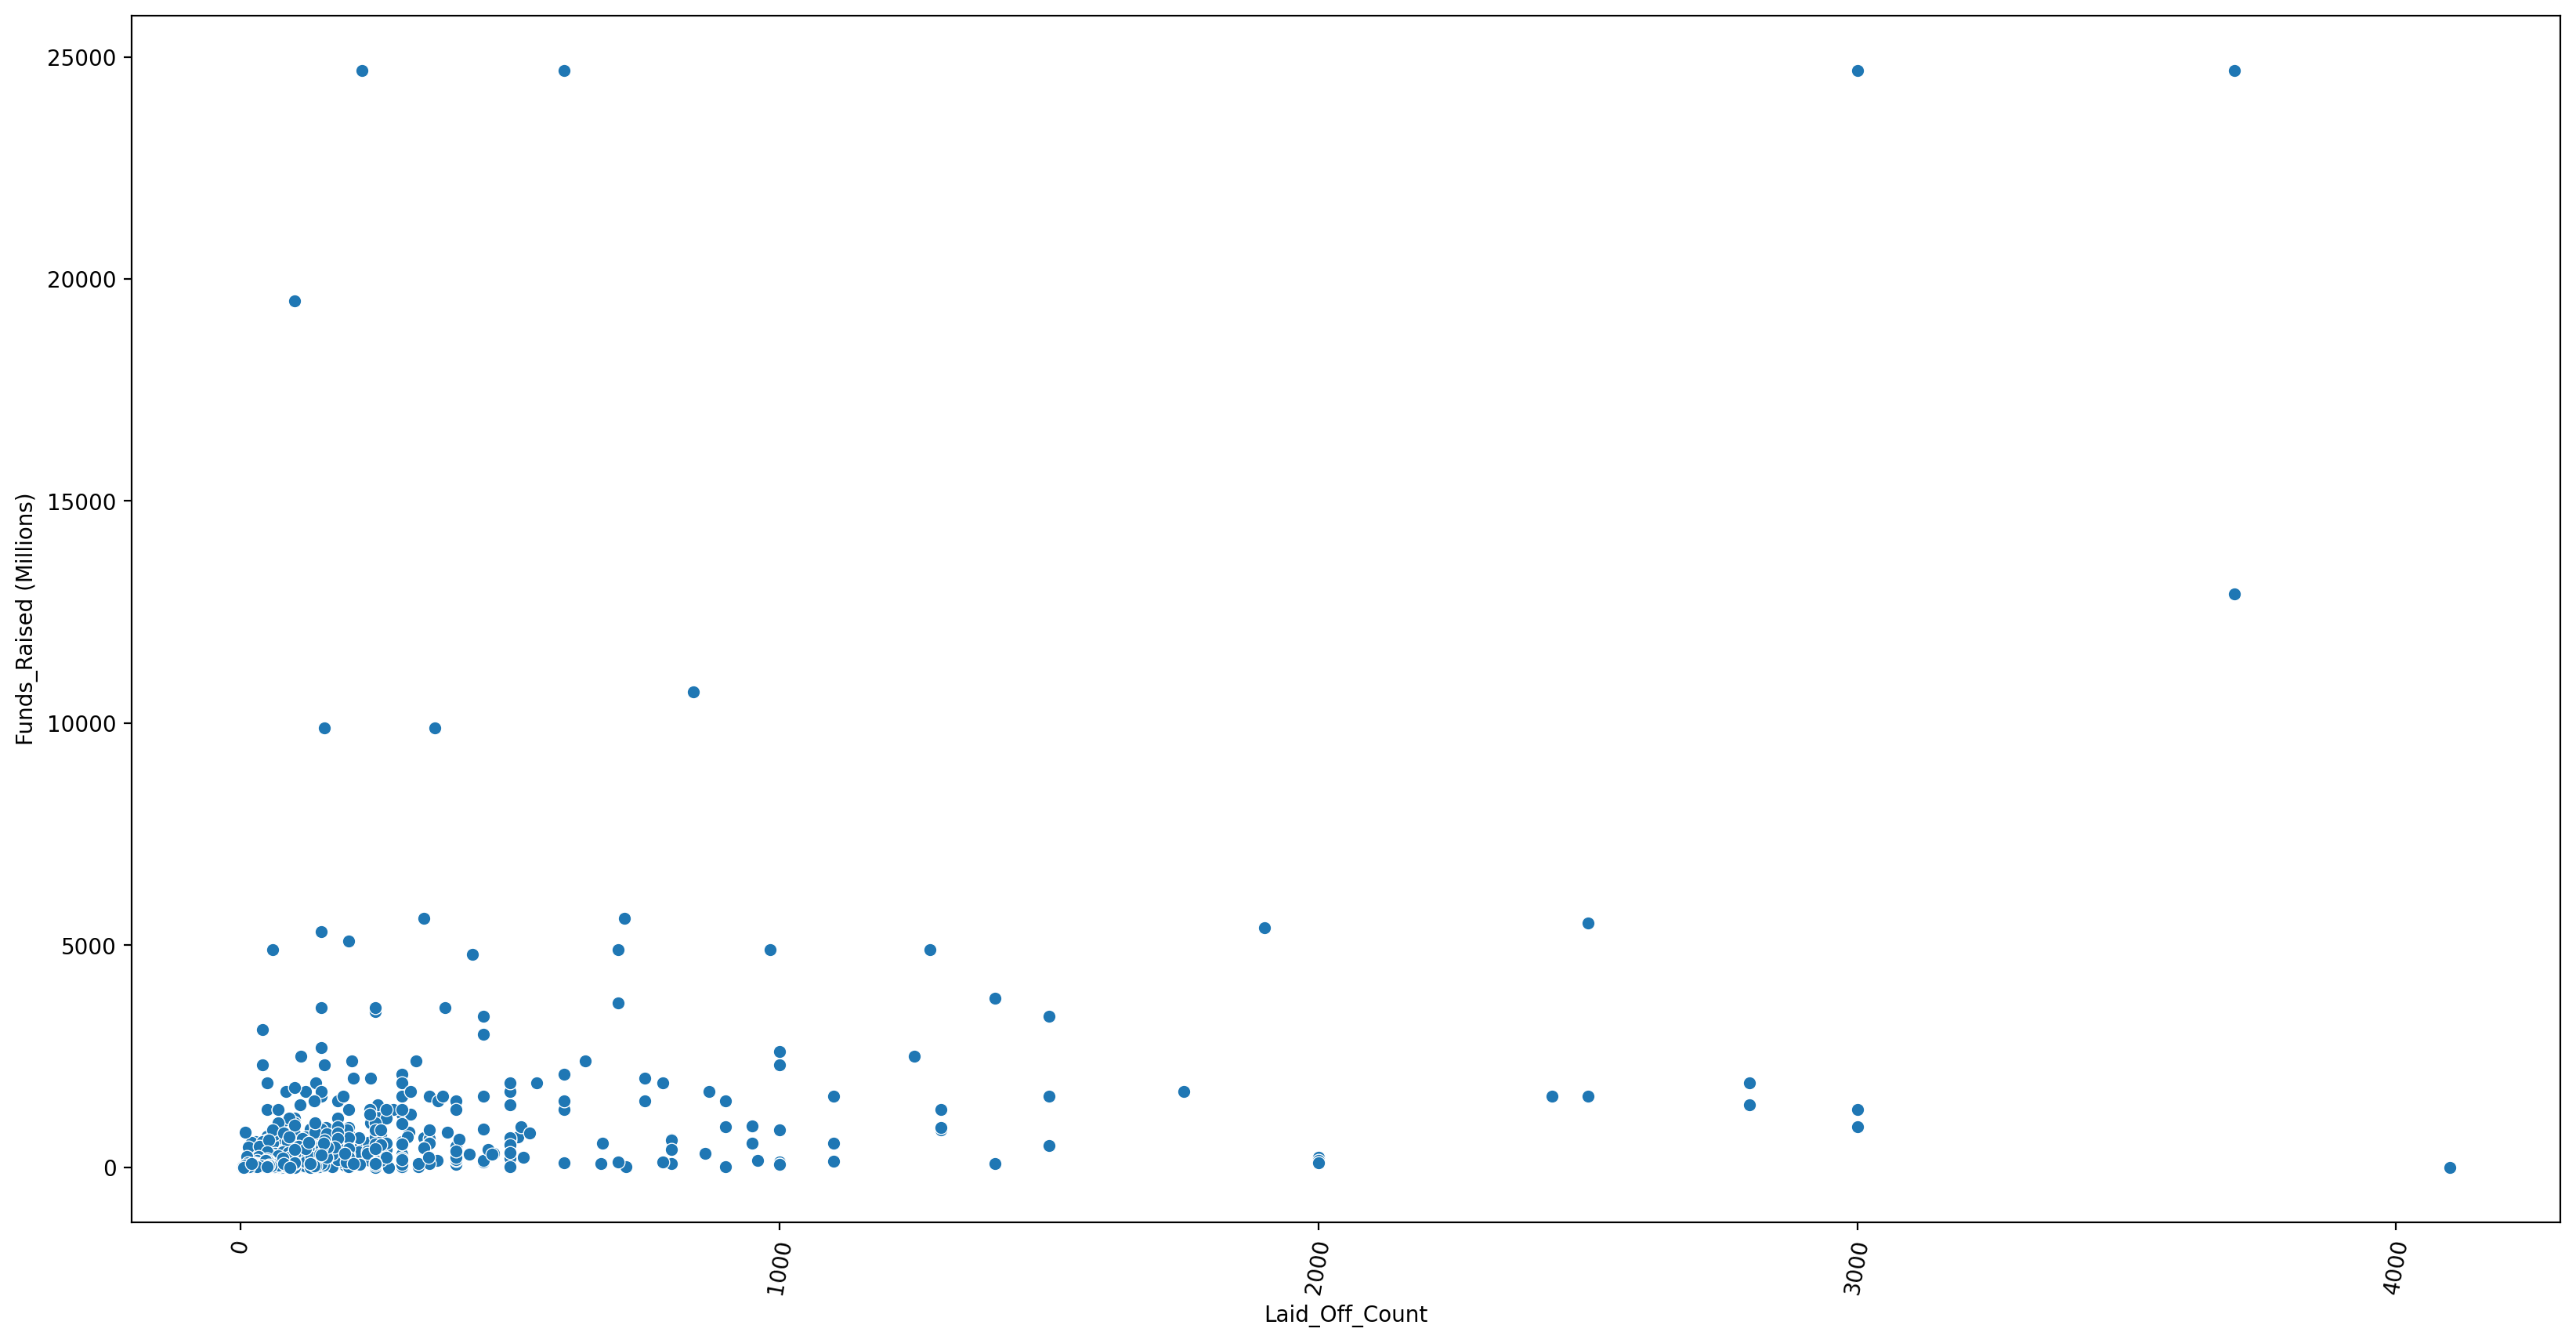

In [21]:
plt.figure(figsize=(20,10), dpi=200)
sns.scatterplot(x='Laid_Off_Count',y='Funds_Raised (Millions)',data=df)
plt.xticks(rotation=80)
plt.show()

### After removing some outliers, our chart took a somewhat normalized form as depicted above and since we don't know whether the data is uniformly sampled, it is not advisable to proceed further with removing outliers

# Dealing with Missing Values

In [22]:
df.isnull().sum()

Company                               0
Location_HQ                           0
Industry                              0
Laid_Off_Count                        0
Percentage                            0
Date                                  0
Source                                0
Funds_Raised (Millions)              91
Stage                                 0
Date_Added                            0
Country                               0
List_of_Employees_Laid_Off            0
Sum of Employees                   1099
Average # of Employees Laid Off    1099
Average Layoff %                   1099
Total Funds Raised                 1099
Average Funds Raised               1099
Unnamed: 17                        1100
Unnamed: 18                        1100
dtype: int64

In [23]:
100*df.isnull().sum()/len(df)

Company                              0.000000
Location_HQ                          0.000000
Industry                             0.000000
Laid_Off_Count                       0.000000
Percentage                           0.000000
Date                                 0.000000
Source                               0.000000
Funds_Raised (Millions)              8.272727
Stage                                0.000000
Date_Added                           0.000000
Country                              0.000000
List_of_Employees_Laid_Off           0.000000
Sum of Employees                    99.909091
Average # of Employees Laid Off     99.909091
Average Layoff %                    99.909091
Total Funds Raised                  99.909091
Average Funds Raised                99.909091
Unnamed: 17                        100.000000
Unnamed: 18                        100.000000
dtype: float64

### From the above cell, we can clearly see that about 99.9% of the values after List_of_Employees_Laid_Off are missing and we have some unnamed columns that we don't know sure about. We can see how we can handle them in the below cells

In [24]:
def percent_missing(df):
    percent_nan = 100* df.isnull().sum() / len(df)
    percent_nan = percent_nan[percent_nan>0].sort_values()
    return percent_nan

In [25]:
percent_nan = percent_missing(df)

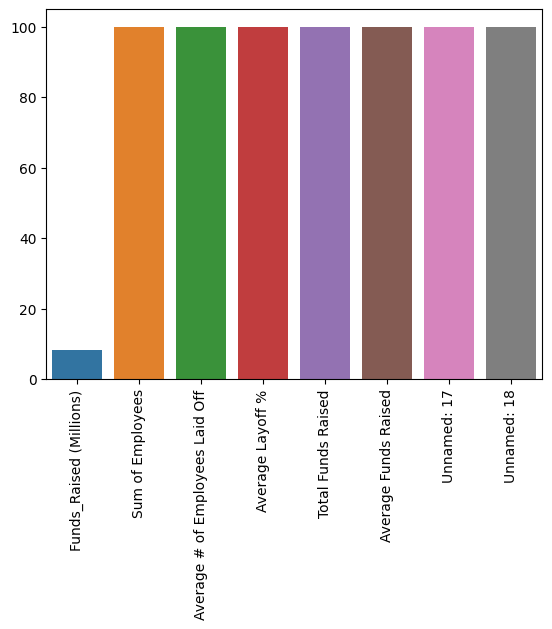

In [26]:
sns.barplot(x=percent_nan.index,y=percent_nan)
plt.xticks(rotation=90);

In [27]:
df = df.drop(['Unnamed: 17','Unnamed: 18', 'Source', 'List_of_Employees_Laid_Off'], axis=1)

In [28]:
df.head()

,Company,Location_HQ,Industry,Laid_Off_Count,Percentage,Date,Funds_Raised (Millions),Stage,Date_Added,Country,Sum of Employees,Average # of Employees Laid Off,Average Layoff %,Total Funds Raised,Average Funds Raised
0,Splunk,SF Bay Area,Data,325,4%,2/1/2023,2400.0,IPO,2/1/2023 17:01,United States,290317.0,262.018953,23%,850192.86,835.98
1,DraftKings,Boston,Consumer,140,4%,2/1/2023,719.0,IPO,2/1/2023 19:08,United States,NaN,NaN,NaN,NaN,NaN
2,Wheel,Austin,Healthcare,56,28%,2/1/2023,215.0,Series C,2/2/2023 0:04,United States,NaN,NaN,NaN,NaN,NaN
3,Chainalysis,New York City,Crypto,44,5%,2/1/2023,536.0,Series F,2/2/2023 3:13,United States,NaN,NaN,NaN,NaN,NaN
4,Exterro,Portland,Legal,24,3%,2/1/2023,100.0,Private Equity,2/2/2023 0:05,United States,NaN,NaN,NaN,NaN,NaN


In [29]:
percent_nan = percent_missing(df)

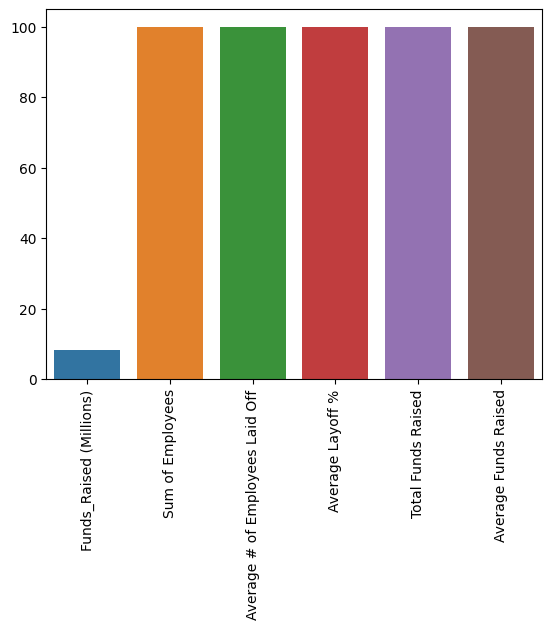

In [30]:
sns.barplot(x=percent_nan.index,y=percent_nan)
plt.xticks(rotation=90);

In [31]:
df.head()

,Company,Location_HQ,Industry,Laid_Off_Count,Percentage,Date,Funds_Raised (Millions),Stage,Date_Added,Country,Sum of Employees,Average # of Employees Laid Off,Average Layoff %,Total Funds Raised,Average Funds Raised
0,Splunk,SF Bay Area,Data,325,4%,2/1/2023,2400.0,IPO,2/1/2023 17:01,United States,290317.0,262.018953,23%,850192.86,835.98
1,DraftKings,Boston,Consumer,140,4%,2/1/2023,719.0,IPO,2/1/2023 19:08,United States,NaN,NaN,NaN,NaN,NaN
2,Wheel,Austin,Healthcare,56,28%,2/1/2023,215.0,Series C,2/2/2023 0:04,United States,NaN,NaN,NaN,NaN,NaN
3,Chainalysis,New York City,Crypto,44,5%,2/1/2023,536.0,Series F,2/2/2023 3:13,United States,NaN,NaN,NaN,NaN,NaN
4,Exterro,Portland,Legal,24,3%,2/1/2023,100.0,Private Equity,2/2/2023 0:05,United States,NaN,NaN,NaN,NaN,NaN


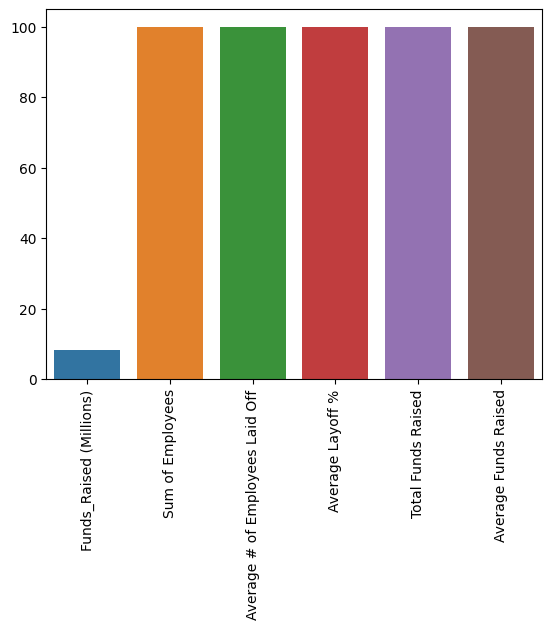

In [32]:
percent_nan = percent_missing(df)
sns.barplot(x=percent_nan.index,y=percent_nan)
plt.xticks(rotation=90);

In [33]:
df = df.drop(['Sum of Employees', 'Average # of Employees Laid Off', 'Average Layoff %', 'Total Funds Raised', 'Average Funds Raised'], axis=1)

In [34]:
df.head()

,Company,Location_HQ,Industry,Laid_Off_Count,Percentage,Date,Funds_Raised (Millions),Stage,Date_Added,Country
0,Splunk,SF Bay Area,Data,325,4%,2/1/2023,2400.0,IPO,2/1/2023 17:01,United States
1,DraftKings,Boston,Consumer,140,4%,2/1/2023,719.0,IPO,2/1/2023 19:08,United States
2,Wheel,Austin,Healthcare,56,28%,2/1/2023,215.0,Series C,2/2/2023 0:04,United States
3,Chainalysis,New York City,Crypto,44,5%,2/1/2023,536.0,Series F,2/2/2023 3:13,United States
4,Exterro,Portland,Legal,24,3%,2/1/2023,100.0,Private Equity,2/2/2023 0:05,United States


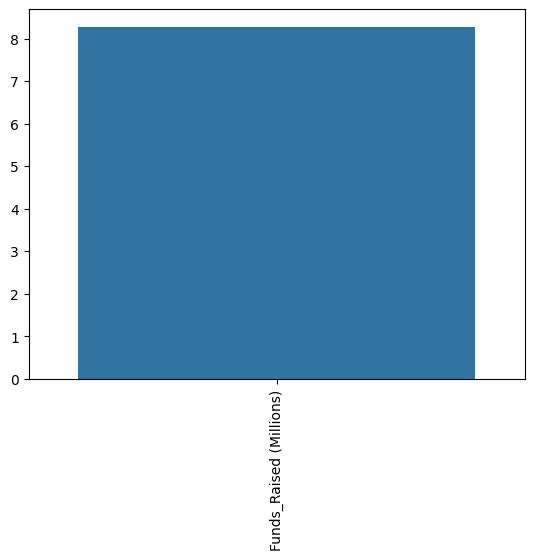

In [35]:
percent_nan = percent_missing(df)
sns.barplot(x=percent_nan.index,y=percent_nan)
plt.xticks(rotation=90);

In [36]:
df['Funds_Raised (Millions)'].fillna(df['Funds_Raised (Millions)'].mean(), inplace=True)

In [37]:
df.head()

,Company,Location_HQ,Industry,Laid_Off_Count,Percentage,Date,Funds_Raised (Millions),Stage,Date_Added,Country
0,Splunk,SF Bay Area,Data,325,4%,2/1/2023,2400.0,IPO,2/1/2023 17:01,United States
1,DraftKings,Boston,Consumer,140,4%,2/1/2023,719.0,IPO,2/1/2023 19:08,United States
2,Wheel,Austin,Healthcare,56,28%,2/1/2023,215.0,Series C,2/2/2023 0:04,United States
3,Chainalysis,New York City,Crypto,44,5%,2/1/2023,536.0,Series F,2/2/2023 3:13,United States
4,Exterro,Portland,Legal,24,3%,2/1/2023,100.0,Private Equity,2/2/2023 0:05,United States


In [38]:
df.isnull().sum()

Company                    0
Location_HQ                0
Industry                   0
Laid_Off_Count             0
Percentage                 0
Date                       0
Funds_Raised (Millions)    0
Stage                      0
Date_Added                 0
Country                    0
dtype: int64

### Thus, we cleared all the missing values by the above process and made the dataset ready for the next step

## Dealing with Categorical Data

In [39]:
df.head()

,Company,Location_HQ,Industry,Laid_Off_Count,Percentage,Date,Funds_Raised (Millions),Stage,Date_Added,Country
0,Splunk,SF Bay Area,Data,325,4%,2/1/2023,2400.0,IPO,2/1/2023 17:01,United States
1,DraftKings,Boston,Consumer,140,4%,2/1/2023,719.0,IPO,2/1/2023 19:08,United States
2,Wheel,Austin,Healthcare,56,28%,2/1/2023,215.0,Series C,2/2/2023 0:04,United States
3,Chainalysis,New York City,Crypto,44,5%,2/1/2023,536.0,Series F,2/2/2023 3:13,United States
4,Exterro,Portland,Legal,24,3%,2/1/2023,100.0,Private Equity,2/2/2023 0:05,United States


In [40]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1100 entries, 0 to 1107
Data columns (total 10 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Company                  1100 non-null   object 
 1   Location_HQ              1100 non-null   object 
 2   Industry                 1100 non-null   object 
 3   Laid_Off_Count           1100 non-null   int64  
 4   Percentage               1100 non-null   object 
 5   Date                     1100 non-null   object 
 6   Funds_Raised (Millions)  1100 non-null   float64
 7   Stage                    1100 non-null   object 
 8   Date_Added               1100 non-null   object 
 9   Country                  1100 non-null   object 
dtypes: float64(1), int64(1), object(8)
memory usage: 94.5+ KB


### Creating 'Dummy Variables' from the Object Columns

#### For this process, I will follow my way of creating the dummy variables. First, we split the dataframe into the one with objects and the one without objects for easy use. And, at final, we can combine the dataframe into one for further use

In [41]:
df_nums = df.select_dtypes(exclude='object')
df_objs = df.select_dtypes(include='object')

In [42]:
df_nums.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1100 entries, 0 to 1107
Data columns (total 2 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Laid_Off_Count           1100 non-null   int64  
 1   Funds_Raised (Millions)  1100 non-null   float64
dtypes: float64(1), int64(1)
memory usage: 25.8 KB


In [43]:
df_objs.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1100 entries, 0 to 1107
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Company      1100 non-null   object
 1   Location_HQ  1100 non-null   object
 2   Industry     1100 non-null   object
 3   Percentage   1100 non-null   object
 4   Date         1100 non-null   object
 5   Stage        1100 non-null   object
 6   Date_Added   1100 non-null   object
 7   Country      1100 non-null   object
dtypes: object(8)
memory usage: 77.3+ KB


In [44]:
df_objs = pd.get_dummies(df_objs,drop_first=True)

In [45]:
final_df = pd.concat([df_nums,df_objs],axis=1)

In [46]:
final_df

,Laid_Off_Count,Funds_Raised (Millions),Company_&Open,Company_10X Genomics,Company_1stdibs,Company_2TM,Company_54gene,Company_6sense,Company_8x8,Company_99,...,Country_Senegal,Country_Seychelles,Country_Singapore,Country_Spain,Country_Sweden,Country_Switzerland,Country_Thailand,Country_United Arab Emirates,Country_United Kingdom,Country_United States
0,325,2400.0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1,140,719.0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2,56,215.0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
3,44,536.0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
4,24,100.0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1103,130,79.0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1104,16,6.0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1105,8,45.0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1106,6,1.0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


# Model Building

### Since, this dataset was not properly sampled and the data is not as much as useful, I'm looking for a model that works well and does'nt overfit in the data and grow. For that, I have taken Random Forest for this problem, that is going to predict the funds that are raised given the other features.

####
####
### I have takes Random Forest beacause, they cannot overfit, as guarenteed by it's inventor, Leo Briman. On the other hand, when comapred to other algorithms such as SVM, LinearRegression, KNN etc., Random Forest performs exceptionally well than the others since they can't overfit.

In [47]:
final_df.head()

,Laid_Off_Count,Funds_Raised (Millions),Company_&Open,Company_10X Genomics,Company_1stdibs,Company_2TM,Company_54gene,Company_6sense,Company_8x8,Company_99,...,Country_Senegal,Country_Seychelles,Country_Singapore,Country_Spain,Country_Sweden,Country_Switzerland,Country_Thailand,Country_United Arab Emirates,Country_United Kingdom,Country_United States
0,325,2400.0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1,140,719.0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2,56,215.0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
3,44,536.0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
4,24,100.0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


### Train Test Split

In [48]:
X = final_df.drop('Funds_Raised (Millions)',axis=1)
y = df['Funds_Raised (Millions)']
y = y.astype(int)

In [49]:
from sklearn.model_selection import train_test_split

In [50]:
 X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

## Random Forest Classification

In [51]:
from sklearn.ensemble import RandomForestRegressor

In [52]:
model = RandomForestRegressor(n_estimators=10,max_features='auto',random_state=101)

In [53]:
model.fit(X_train,y_train)

C:\Users\SURIYA\miniconda3\lib\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


RandomForestRegressor(max_features='auto', n_estimators=10, random_state=101)

In [54]:
preds = model.predict(X_test)

# Evaluation

In [55]:
from sklearn.metrics import mean_squared_error

In [56]:
mse = mean_squared_error(y_test, preds)

In [57]:
mse

1403788.4366115702

In [58]:
rmse = np.sqrt(mse)

In [59]:
rmse

1184.8157817194917

# Conclusion

Although, random forest doesnot overfit, the rmse value of the model is high. This is due to the skewness and the scarcity of data that is not provided for the model to get insights for it. Since, the data is not properly sampled and taken with caution, it resulted in poor dataset formation which then led to a model that performs poor.

## Final Thoughts

By seeing this dataframe, we don't know if the 2628 columns is very useful. More columns doesn't necessarily lead to better results. In fact, we may want to further remove columns (or later on use a model with regularization to choose important columns for us). What we have done here has greatly expanded the ratio of rows to columns, which may actually lead to worse performance (however we don't know until we've actually compared multiple models/approaches).